In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/Breast_cancer_data.csv')

print(df)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness   
0          17.99         10.38          122.80     1001.0          0.11840  \
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0  
1            0  
2           

In [3]:
df.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


<Axes: >

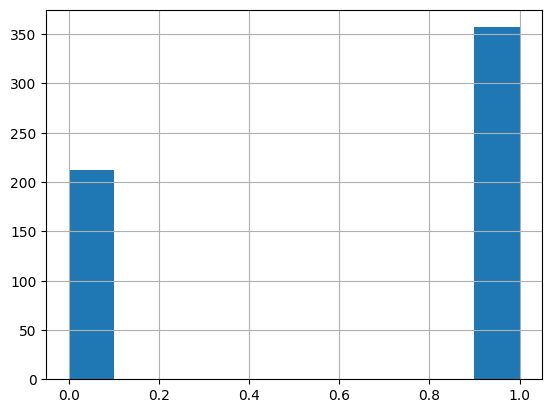

In [4]:
# Lets convert our data for bias
df['diagnosis'].hist()

<Axes: >

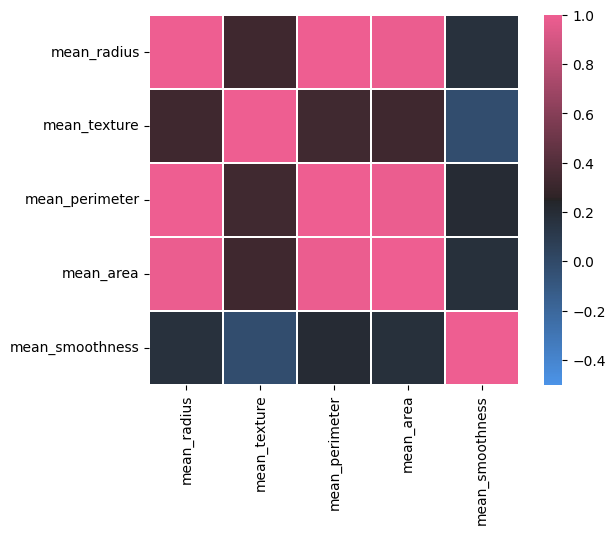

In [6]:
# Lets build something to visualise undepandance od data features
corr = df.iloc[:,:-1].corr(method='pearson')
cmap = sns.diverging_palette(250, 354, 80, 60, center = 'dark', as_cmap = True)
sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [10]:
# Let's take not all features, to save indapendense between them
data = df[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head(10)

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
5,12.45,15.70,0.12780,0
6,18.25,19.98,0.09463,0
7,13.71,20.83,0.11890,0
8,13.00,21.82,0.12730,0
9,12.46,24.04,0.11860,0


<Axes: xlabel='mean_smoothness', ylabel='Count'>

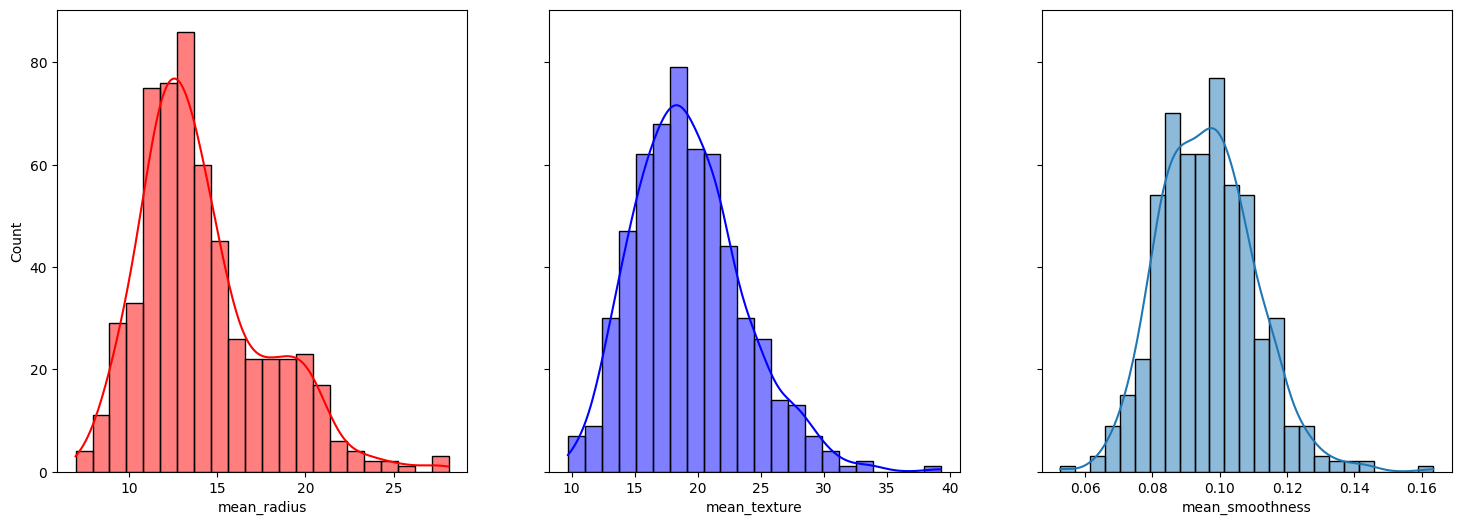

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18 ,6), sharey=True)
sns.histplot(data, ax = axes[0], x ="mean_radius", kde="True", color="r")
sns.histplot(data, ax = axes[1], x ="mean_texture", kde="True", color="b")
sns.histplot(data, ax = axes[2], x ="mean_smoothness", kde="True")

1. Calculate P(Y=y) for all posible y

In [24]:
def calc_prior(data, Y) -> list:
    classes = sorted(list(data[Y].unique()))
    prior = []
    for event in classes:
        prior.append(len(data[data[Y] == event])/len(data))
    return prior

prior = calc_prior(data, 'diagnosis')